In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Macarons Analysis

In [ ]:
def load_and_join(day):
    prices = pl.read_csv(
        f"round-4-island-data-bottle/prices_round_4_day_{day}.csv", separator=";"
    )
    prices = prices.pivot(
        index="timestamp",
        on="product",
        values="mid_price",
    )
    conversions = pl.read_csv(
        f"round-4-island-data-bottle/observations_round_4_day_{day}.csv"
    )
    combined = prices.join(conversions, on="timestamp", how="inner")
    combined = combined.with_columns(
        pl.col("timestamp").add((day - 1) * int(1e6)).alias("time")
    )
    return combined


day_1 = load_and_join(1)
day_2 = load_and_join(2).select(day_1.columns)
day_3 = load_and_join(3).select(day_1.columns)
df = pl.concat([day_1, day_2, day_3], how="vertical").drop("timestamp")
df.describe()

statistic,VOLCANIC_ROCK,PICNIC_BASKET1,PICNIC_BASKET2,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,CROISSANTS,MAGNIFICENT_MACARONS,VOLCANIC_ROCK_VOUCHER_10250,SQUID_INK,VOLCANIC_ROCK_VOUCHER_10500,RAINFOREST_RESIN,KELP,JAMS,VOLCANIC_ROCK_VOUCHER_10000,DJEMBES,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,time
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",10210.920383,58450.475333,30117.485817,711.31435,463.767617,4260.274417,663.6359,79.910733,1852.753617,17.404083,10000.006717,2044.14935,6509.741767,236.2162,13348.8109,662.880117,664.394933,1.577587,10.1648,-3.677783,202.201901,55.167418,1.49995e6
"""std""",154.265012,201.770936,78.079237,154.049952,151.233739,15.808144,74.554241,76.043725,47.238399,23.720984,2.181606,7.693742,21.28514,129.315222,48.045335,74.544616,74.545667,0.374981,0.686979,1.111055,6.707842,10.327112,866039.837421
"""min""",9856.5,58038.0,29926.5,359.5,133.5,4226.5,523.5,1.5,1734.5,0.0,9994.5,2029.5,6438.0,18.5,13242.5,522.5,524.0,1.0,9.0,-6.0,191.684683,20.0,0.0
"""25%""",10132.5,58290.5,30066.0,633.0,385.5,4249.5,610.5,29.5,1813.5,3.0,10000.0,2037.0,6499.0,158.5,13302.0,610.0,611.5,1.1,9.5,-4.0,197.130706,47.21,750000.0
"""50%""",10196.5,58416.5,30102.5,696.5,447.5,4261.0,653.5,49.5,1851.5,5.5,10000.0,2045.0,6515.5,210.5,13352.0,653.0,654.5,1.7,10.0,-3.5,199.932414,55.0,1.5e6
"""75%""",10301.5,58601.0,30175.0,801.5,551.5,4272.5,698.5,108.5,1887.0,19.5,10000.0,2049.5,6523.5,308.5,13382.0,697.5,699.0,1.9,10.5,-3.0,205.817012,64.19,2.2499e6
"""max""",10519.5,58984.5,30316.5,1019.5,770.5,4314.5,940.5,282.5,1987.0,97.5,10005.5,2065.5,6554.0,521.5,13498.5,939.0,940.5,2.1,11.5,-2.0,220.14033,70.0,2.9999e6


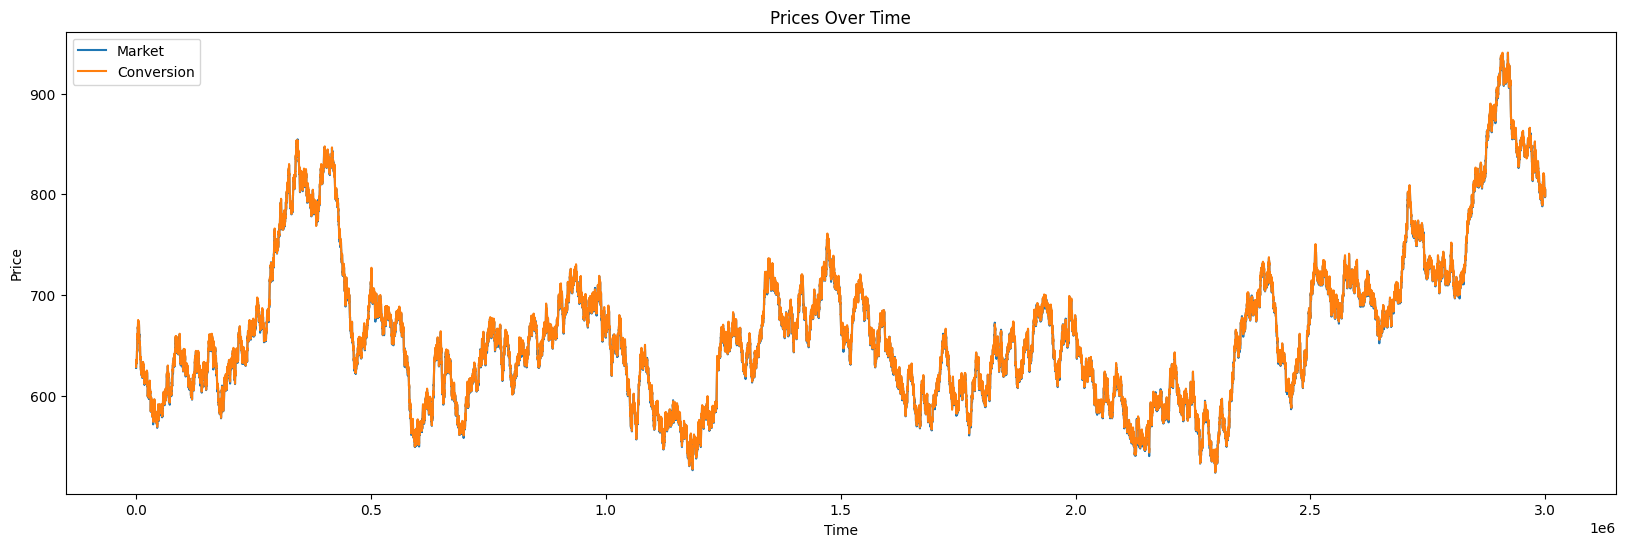

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(df["time"], df["MAGNIFICENT_MACARONS"], label="Market")
plt.plot(df["time"], df["askPrice"], label="Conversion")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Prices Over Time")
plt.legend()
plt.show()

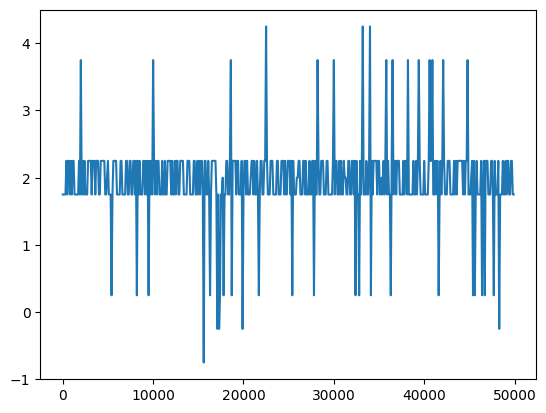

In [5]:
t = 500
plt.plot(
    df["time"][:t],
    df["MAGNIFICENT_MACARONS"][:t]
    - (df["bidPrice"][:t] + df["askPrice"][:t]) / 2
    - df["transportFees"][:t]
    - df["importTariff"][:t],
    label="Market",
)

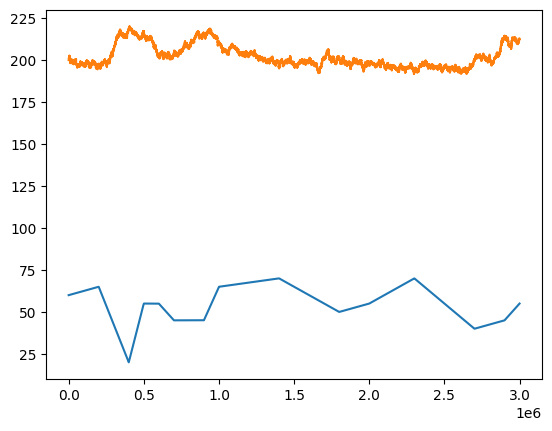

In [6]:
plt.plot(df["time"], df["sunlightIndex"])
plt.plot(df["time"], df["sugarPrice"])

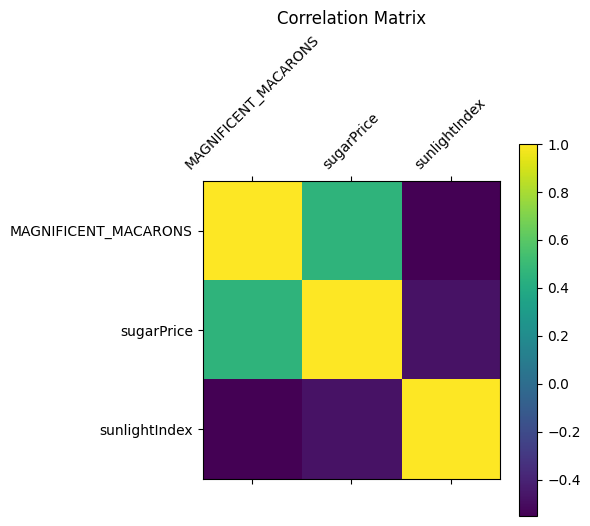

In [7]:
# corrrelation matrix
corr = df.select(["MAGNIFICENT_MACARONS", "sugarPrice", "sunlightIndex"]).corr()
# plot the correlation matrix with values
plt.matshow(corr, cmap="viridis", fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")

plt.colorbar()

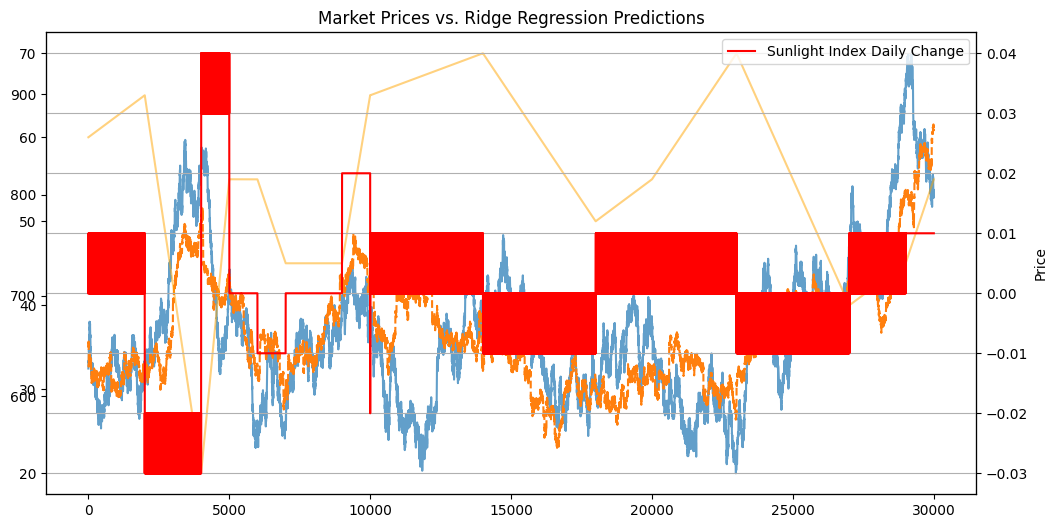

array([  6.5060752 ,  32.12681382, -47.20448061, -55.19232532])
np.float64(-425.7490194870545)


In [19]:
from sklearn.linear_model import Ridge  # Import Ridge regression

# Select features and target
X = df.select(
    [
        "sugarPrice",
        "transportFees",
        "exportTariff",
        "importTariff",
    ]
).to_numpy()
y = df["MAGNIFICENT_MACARONS"].to_numpy()

# Instantiate and fit the Ridge model
# alpha controls the regularization strength; higher alpha means stronger regularization
model = Ridge(alpha=1.0)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))  # Added figure size for better visibility
plt.plot(y, label="Market (Actual)", alpha=0.7)
plt.plot(predictions, label="Predictions (Ridge)", linestyle="--")
# plot sunlight index on separate axis
plt.twinx().plot(df["sunlightIndex"], label="Sunlight Index", color="orange", alpha=0.5)
# plot sunlight index daily change
plt.twinx().plot(
    df["sunlightIndex"].diff(),
    label="Sunlight Index Daily Change",
    color="red",
)

plt.title("Market Prices vs. Ridge Regression Predictions")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the Ridge model and corresponding feature names
print(model.coef_.__repr__())
print(model.intercept_.__repr__())